Importing the required libraries

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from random import seed
from random import randrange
from sklearn.linear_model import SGDClassifier
import sys
from io import StringIO 
import warnings
warnings.filterwarnings('ignore')

#Question 2.1.a

 Loading the dataset

In [ ]:
DF = pd.read_csv('diabetes2.csv')

 preprocessing and spliting the dataset into training and testing sets

In [ ]:
#shuffling of data to ensure iid 
np.random.seed(0)
DF = DF.sample(frac=1)

As datapoints has 0 values i.e we have 0 value in pregancies column and other columns,also there is a disturbance in input value, so to handle this.

Assumption 1 : Replacing the 0 values of all the columns to median of its column

Assumption 2: performing mean normalization to change the range of input variable as there in noice in the data


In [ ]:
#replacing the 0 value of the columns to median of the column
DF['Pregnancies'].replace(to_replace=0, value=DF['Pregnancies'].median(), inplace=True)
DF['Glucose'].replace(to_replace=0, value=DF['Glucose'].median(), inplace=True)
DF['BloodPressure'].replace(to_replace=0, value=DF['BloodPressure'].median(), inplace=True)
DF['SkinThickness'].replace(to_replace=0, value=DF['SkinThickness'].median(), inplace=True)
DF['Insulin'].replace(to_replace=0, value=DF['Insulin'].median(), inplace=True)
DF['BMI'].replace(to_replace=0, value=DF['BMI'].median(), inplace=True)

#performing  mean normalization
X = DF.iloc[:, :-1].values
Y = DF.iloc[:, -1].values
X = (X-X.mean())/X.std()    

In [ ]:
#spilting the data
m = X.shape[0]
train_size = int(m*0.7)
fold = int(((m-train_size)*2)/3)
test_size = m-train_size-fold

X_train, Y_train = X[:train_size], Y[:train_size]
X_test, Y_test = X[-test_size:], Y[-test_size:]
X_val , Y_val = X[train_size:-test_size], Y[train_size:-test_size]

Implementing the Loss and Gradient descent function from scratch

In [ ]:
#sigmoid function
""" 
    Parameters:
    z: y hat
  
    Returns:
    sig: sigmoid of y hat
    
"""
def sigmoid(z):
 sig = 1/(1+np.exp(-z))
 return sig

In [ ]:
#loss function
""" 
    Parameters:
    x: features
    y: target values
    w: weights
    b: bias
    
    Returns:
    loss: loss w.r.t bias and weights
    
    """
def loss_function(x,y,w,b):
  h = sigmoid(x.dot(w) + b)
  return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
   

In [ ]:
#Gradient SGD function
""" 
    Parameters:
    x: features
    y: target values
    w: weights
    b: bias
    alpha = learning rate
    epoch = iteration
    
    Returns:
    cost_train: cost of train data per epoch
    cost_val: cost of val data per epoch
    w: final weights
    b: final bias
    """
def gradient_SGD_function(x,y, w, b,alpha=10, epoch=100):
  m=x.shape[0]
  cost_train = [0] * epoch
  cost_val= [0] * epoch

  for epoch in range(epoch):

      # random index from total samples
      i = randrange(len(x))
      # calculating y hat
      ŷ = sigmoid(np.dot(w, x[i].T) + b)
      # calculating the loss
      loss = y[i] - ŷ
      # calculating the gradient descent
      weight_gradient  = x[i].T.dot(loss)/(-2*m)
      bias_gradient = loss/(-2*m)
      # updating weights and bias
      w = w - alpha* weight_gradient
      b = b - alpha* bias_gradient
      # storing the curernt lost value of train and val data
      cost1 = loss_function(x, y, w, b)
      cost_train[epoch] = cost1
      cost2 = loss_function(X_val, Y_val, w, b)
      cost_val[epoch] = cost2
          
  return w, b, cost_train, cost_val

In [ ]:
'''At first intializing some random weights for each feature and bias and then calling the gradient descent function to get the
best model coefficients and bias
'''
#initial zero weights
w = np.zeros_like(X_train[0])
#initial bias
b = 0
#calling for train data and val data
weight, bias ,costs_train ,costs_val = gradient_SGD_function(X_train, Y_train, w, b, alpha=0.01,epoch= 100);

Text(0.5, 1.0, 'Plot for SGD')

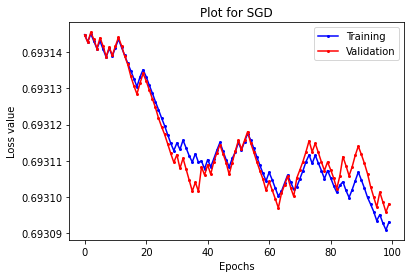

In [ ]:
#plotting graph  of training loss v/s iterations 
epochs = range(100)
plt.xlabel('Epochs')
plt.ylabel('Loss value')
plt.plot(epochs, costs_train, marker='o',markersize=2, color='blue', label='Training')
plt.plot(epochs, costs_val, marker='o',markersize=2, color='red', label='Validation')
plt.legend()
plt.title("Plot for SGD")

In [ ]:
#Gradient BGD function
""" 
    Parameters:
    x: features
    y: target values
    w: weights
    b: bias
    alpha = learning rate
    epoch = iteration
    
    Returns:
    cost_train: cost of train data per epoch
    cost_val: cost of val data per epoch
    w: final weights
    b: final bias
    """
def gradient_BGD_function(x, y, w, b,alpha=0.001, epochs = 100):
	
  m = len(y)
  cost_train = [0] * epochs
  cost_val = [0]*epochs  

  for epoch in range(epochs):
       # calculating y hat
      ŷ = sigmoid(x.dot(w) + b)
      # calculating the loss 
      loss = ŷ-y
       # calculating the gradient descent
      weight_gradient = x.T.dot(loss) / m
      bias_gradient =  np.sum(loss) / m
      # updating weights and bias
      w = w - alpha*weight_gradient
      b = b - alpha*bias_gradient
      # storing the curernt lost value of train and val data
      cost = loss_function(x, y, w, b)
      cost_train[epoch] = cost
      cost2 = loss_function(X_val, Y_val, w, b)
      cost_val[epoch] = cost2

  return w, b , cost_train , cost_val

In [ ]:
#initial zero weights
w = np.zeros_like(X_train[0])
#initial bias
b = 0
weight, bias ,costs_train ,costs_val = gradient_BGD_function(X_train, Y_train, w, b, epochs= 1000);

Text(0.5, 1.0, 'Plot for BGD')

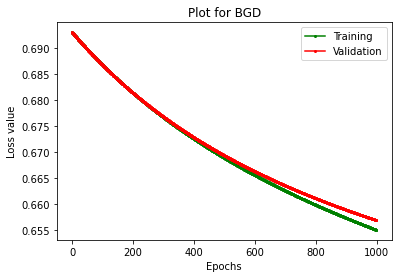

In [ ]:
#plotting graph  of training loss v/s iterations 
epochs = range(1000)
plt.xlabel('Epochs')
plt.ylabel('Loss value')
plt.plot(epochs, costs_train, marker='o',markersize=2, color='green', label='Training')
plt.plot(epochs, costs_val, marker='o',markersize=2, color='red', label='Validation')
plt.legend()
plt.title("Plot for BGD")

#Question 2.1.b

For 0.01 learning rate

In [ ]:
#initial zero weights
w = np.zeros_like(X_train[0])
#initial bias
b = 0
weight, bias ,costs_train ,costs_val = gradient_BGD_function(X_train, Y_train, w, b,alpha=0.01, epochs= 1000);

Text(0.5, 1.0, 'Plot for BGD')

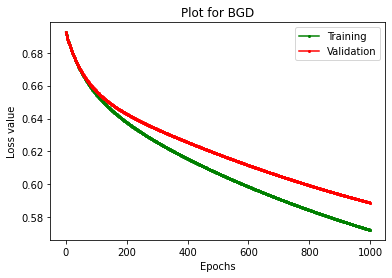

In [ ]:
#plotting graph  of training loss v/s iterations 
epochs = range(1000)
plt.xlabel('Epochs')
plt.ylabel('Loss value')
plt.plot(epochs, costs_train, marker='o',markersize=2, color='green', label='Training')
plt.plot(epochs, costs_val, marker='o',markersize=2, color='red', label='Validation')
plt.legend()
plt.title("Plot for BGD")

Text(0.5, 1.0, 'Plot for SGD')

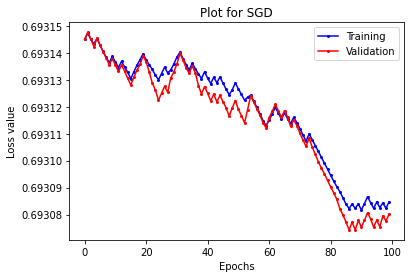

In [ ]:
#initial zero weights
w = np.zeros_like(X_train[0])
#initial bias
b = 0
#calling for train data and val data
weight, bias ,costs_train ,costs_val = gradient_SGD_function(X_train, Y_train, w, b, alpha=0.01,epoch= 100);


#plotting graph  of training loss v/s iterations 
epochs = range(100)
plt.xlabel('Epochs')
plt.ylabel('Loss value')
plt.plot(epochs, costs_train, marker='o',markersize=2, color='blue', label='Training')
plt.plot(epochs, costs_val, marker='o',markersize=2, color='red', label='Validation')
plt.legend()
plt.title("Plot for SGD")

For learning rate 0.0001

Text(0.5, 1.0, 'Plot for BGD')

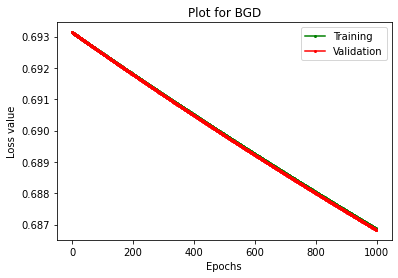

In [ ]:
#initial zero weights
w = np.zeros_like(X_train[0])
#initial bias
b = 0
weight, bias ,costs_train ,costs_val = gradient_BGD_function(X_train, Y_train, w, b,alpha=0.0001, epochs= 1000);

#plotting graph  of training loss v/s iterations 
epochs = range(1000)
plt.xlabel('Epochs')
plt.ylabel('Loss value')
plt.plot(epochs, costs_train, marker='o',markersize=2, color='green', label='Training')
plt.plot(epochs, costs_val, marker='o',markersize=2, color='red', label='Validation')
plt.legend()
plt.title("Plot for BGD")

Text(0.5, 1.0, 'Plot for SGD')

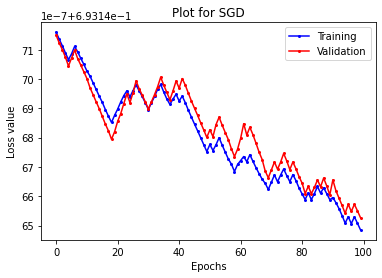

In [ ]:
#initial zero weights
w = np.zeros_like(X_train[0])
#initial bias
b = 0
#calling for train data and val data
weight, bias ,costs_train ,costs_val = gradient_SGD_function(X_train, Y_train, w, b, alpha=0.0001,epoch= 100);


#plotting graph  of training loss v/s iterations 
epochs = range(100)
plt.xlabel('Epochs')
plt.ylabel('Loss value')
plt.plot(epochs, costs_train, marker='o',markersize=2, color='blue', label='Training')
plt.plot(epochs, costs_val, marker='o',markersize=2, color='red', label='Validation')
plt.legend()
plt.title("Plot for SGD")

For Learning rate 10

Text(0.5, 1.0, 'Plot for BGD')

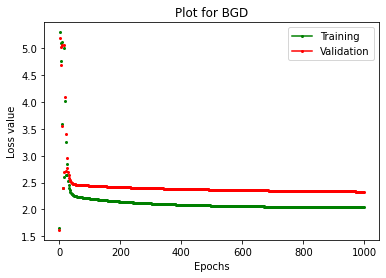

In [ ]:
#initial zero weights
w = np.zeros_like(X_train[0])
#initial bias
b = 0
weight, bias ,costs_train ,costs_val = gradient_BGD_function(X_train, Y_train, w, b,alpha=10, epochs= 1000);

#plotting graph  of training loss v/s iterations 
epochs = range(1000)
plt.xlabel('Epochs')
plt.ylabel('Loss value')
plt.plot(epochs, costs_train, marker='o',markersize=2, color='green', label='Training')
plt.plot(epochs, costs_val, marker='o',markersize=2, color='red', label='Validation')
plt.legend()
plt.title("Plot for BGD")

Text(0.5, 1.0, 'Plot for SGD')

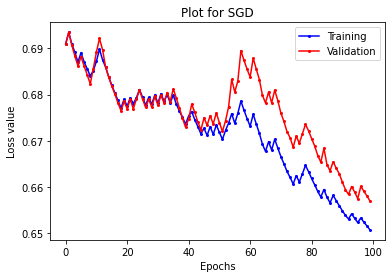

In [ ]:
#initial zero weights
w = np.zeros_like(X_train[0])
#initial bias
b = 0
#calling for train data and val data
weight, bias ,costs_train ,costs_val = gradient_SGD_function(X_train, Y_train, w, b, alpha=10,epoch= 100);


#plotting graph  of training loss v/s iterations 
epochs = range(100)
plt.xlabel('Epochs')
plt.ylabel('Loss value')
plt.plot(epochs, costs_train, marker='o',markersize=2, color='blue', label='Training')
plt.plot(epochs, costs_val, marker='o',markersize=2, color='red', label='Validation')
plt.legend()
plt.title("Plot for SGD")

#Question 2.1.c

In [ ]:
#Method to predict the class label
""" 
    Parameters:
    x: features
    w: weights
    b: bias
    
    Returns:
    predict list : contain all the predicted class labels
    """
def predictions(X,w,b):
  m = len(X)
  predict = []
  for i in range(m):
    z=np.dot(w,X[i])+b
    if sigmoid(z) >= 0.5: 
      predict.append(1)
    else:
      predict.append(0)
  return np.array(predict)

In [ ]:
#calculating Y_pred
Y_pred = predictions(X_test,weight,bias)

In [ ]:
#Confusion matrix function
""" 
    Parameters:
    y: actual vales
    y_pred: predicted values
    b: bias
    
    Returns:
    accuracy
    precision
    recall
    f1
    """
def confusion_matrix(y,y_pred):

  m = len(y)
  fp = 0
  fn = 0

  tp = 0
  tn = 0

# classifying a t or f
  for y, y_pred in zip(y, y_pred):
     
      if y_pred == y: 
          if y_pred == 1: 
              tp += 1
          else: 
              tn += 1
      else: 
          if y_pred == 1: 
              fp += 1
          else: 
              fn += 1

  # Confusion matrix      
  Confusion_matrix = np.array([[tn, fp],[fn, tp]])
  # accuracy      
  accuracy = np.divide((tp+tn),m)
  #precision
  precision = np.divide(tp,(tp+fp))
  #recall
  recall = np.divide(tp,(tp+fn))
  #f1
  f1 = 2*(precision * recall)/(precision+recall)
  
  return  accuracy , precision , recall , f1

In [ ]:
accuracy , precision , recall , f1 = confusion_matrix(Y_test , Y_pred)
print(accuracy , precision , recall , f1)

0.7012987012987013 0.5 0.13043478260869565 0.20689655172413793


#Question 2.1.a

No handles with labels found to put in legend.


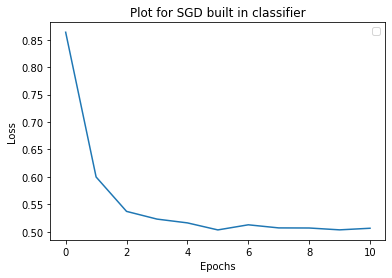

In [ ]:
#Loss plot using SGDClassifier on test data

#sys.stout to display the output 
old_stdout = sys.stdout
sys.stdout = mystdout = StringIO()

alpha=0.01
epochs=100

#SGDClassifier model
#using verbose to print the loss in each iteration
clf = SGDClassifier(loss="log", alpha=alpha, max_iter=epochs , verbose =1 )
clf.fit(X_train,Y_train)

sys.stdout = old_stdout
loss_history = mystdout.getvalue()
loss = []

#spiliting to get the loss from the verbose printing 
for line in loss_history.split('\n'):
    if(len(line.split("loss: ")) == 1):
        continue
    loss.append(float(line.split("loss: ")[-1]))


plt.figure()
plt.plot(np.arange(len(loss)), loss)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Plot for SGD built in classifier")
plt.show()



No handles with labels found to put in legend.


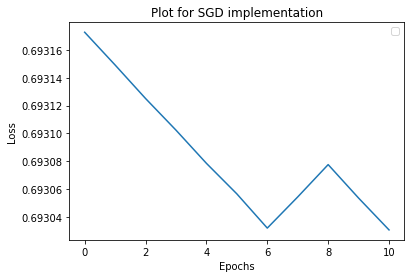

In [ ]:
#Loss plot using own implementation
w = np.zeros_like(X_test[0])
b = 0
weight, bias ,costs_test ,costs_val = gradient_SGD_function(X_test, Y_test, w, b, alpha=0.01,epoch= 11);

epochs = range(11)
plt.figure()
plt.plot(epochs, costs_test)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Plot for SGD implementation")
plt.show()


#Question 2.2.b

In [ ]:
#for sklearn’s implementation
Y_pred_test= clf.predict(X_test)
print('Number epochs to converge of sklearn: ',clf.n_iter_,'\n')

Number epochs to converge of sklearn:  11 



In [ ]:
#for own implementation

#Question 2.2.c

In [ ]:
#for sklearn’s implementation
accuracy , precision , recall , f1 = confusion_matrix(Y_test , Y_pred_test)
print("For sklearn implementation")
print(accuracy , precision , recall , f1)

For sklearn implementation
0.7792207792207793 0.7142857142857143 0.43478260869565216 0.5405405405405405


In [ ]:
#for own implementation
accuracy , precision , recall , f1 = confusion_matrix(Y_test , Y_pred)
print("For own implementation")
print(accuracy , precision , recall , f1)

For own implementation
0.7012987012987013 0.5 0.13043478260869565 0.20689655172413793
